In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.feature_extraction.text import CountVectorizer
import re

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [4]:
data.describe()

,points,price
count,82657.000000,77088.000000
mean,88.544564,36.922232
std,3.099649,43.698346
min,80.000000,4.000000
25%,86.000000,18.000000
50%,88.000000,27.000000
75%,91.000000,45.000000
max,100.000000,3300.000000


In [5]:
data.dtypes

user_name              object
country                object
review_title           object
review_description     object
designation            object
points                  int64
price                 float64
province               object
region_1               object
region_2               object
winery                 object
variety                object
dtype: object

 ##### Dropping the username column.

In [6]:
data.drop(columns = 'user_name', axis = 1, inplace = True)

## Data Cleaning and Analysis

In [7]:
data.isna().sum()

country                  35
review_title              0
review_description        0
designation           23647
points                    0
price                  5569
province                 35
region_1              12754
region_2              46708
winery                    0
variety                   0
dtype: int64

In [8]:
print('1. The total unique values in the Designation column are:', len(data['designation'].unique()))
print('2. The total unique values in the Variety column are:', len(data['variety'].unique()))
print('3. The total unique values in the Province column are:', len(data['province'].unique()))
print('4. The total unique values in the Country column are:', len(data['country'].unique()))
print('4. The total unique values in the region_1 column are:', len(data['region_1'].unique()))


1. The total unique values in the Designation column are: 26425
2. The total unique values in the Variety column are: 28
3. The total unique values in the Province column are: 359
4. The total unique values in the Country column are: 39
4. The total unique values in the region_1 column are: 1020


#### Handling null values

The number of NaN values in the region_2 column are more than the half the total number tupples, and many values in the column are similar to region_1 column. Hence I'll be dropping that column.
Next is the Designation column where a total of 23647 values are missing. Having checked the unique valeus which account for 26425,it is not possible to fill in the missing values. Hence, I'll be dropping the designation column.


In [9]:
data.drop(columns = ['region_2','designation'], axis = 1, inplace = True)
data.dropna(subset = ['province', 'country'], inplace = True)

The Na values in the price column are replaced with the mean values of the price columns.

In [10]:
data['price'] = data['price'].fillna(data['price'].mean())

In [11]:
data[data['variety'] == 'Red Blend'].head(20)

,country,review_title,review_description,points,price,province,region_1,winery,variety
1,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,89,15.0,Washington,Columbia Valley (WA),North by Northwest,Red Blend
6,US,Gordon Estate 2012 Tradition Red (Columbia Val...,"Half Syrah and half Cabernet Sauvignon, with 4...",91,45.0,Washington,Columbia Valley (WA),Gordon Estate,Red Blend
9,Italy,Mannucci Droandi 2009 Ceppeto Riserva (Chiant...,This blend of Sangiovese and 10% Merlot opens ...,86,31.0,Tuscany,Chianti Classico,Mannucci Droandi,Red Blend
14,Chile,Lapostolle 2007 Clos Apalta Red (Colchagua Val...,Outstanding as always. Right from the first ta...,93,80.0,Colchagua Valley,NaN,Lapostolle,Red Blend
16,Italy,Pietro Zardini 2009 Amarone della Valpolicella,"Ripe dark fruit, leather and chocolate aromas ...",91,40.0,Veneto,Amarone della Valpolicella,Pietro Zardini,Red Blend
30,Italy,Cottanera 2011 Rosso (Etna),A blend of Nerello Mascalese and Nerello Cappu...,89,49.0,Sicily & Sardinia,Etna,Cottanera,Red Blend
41,US,Heartache 2011 Red (California),"This basic wine that has earthy aromas, slight...",81,11.0,California,California,Heartache,Red Blend
69,Italy,Terre del Principe 2012 Castello delle Femmine...,Here's a unique blend of two of Campania's lit...,88,40.0,Southern Italy,Terre del Volturno,Terre del Principe,Red Blend
90,Chile,Santa Rita 2013 Triple C Red (Maipo Valley),"A stacked nose includes aromas of tomato, herb...",92,40.0,Maipo Valley,NaN,Santa Rita,Red Blend
98,Italy,Tenuta Monteti 2007 Caburnio Red (Toscana),The picturesque hilltop hamlet of Capalbio in ...,91,22.0,Tuscany,Toscana,Tenuta Monteti,Red Blend


After analyzing the columns; review_title, province, region_1, and winery, it can be seen that the 'review_title' contains informaion about the region and the winery. Additionally, it also contains information about the dependent variable ie; variety. 
This makes the 'region_1' and the 'winery' columns redundant.   
(Note that the 'review_title' column contains the variety of the wine along with the region adn winery information which makes it more important)

In [13]:
data.drop(columns = ['region_1', 'winery'], axis = 1, inplace = True)

#### Finding duplicate values

In [14]:
len(data[data.duplicated() == True])

5014

In [15]:
new_data = data[data.duplicated() == False]
new_data.shape

(77608, 7)

In [16]:
new_data.head()

,country,review_title,review_description,points,price,province,variety
0,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",83,10.0,Australia Other,Chardonnay
1,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,89,15.0,Washington,Red Blend
2,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,94,80.0,Piedmont,Nebbiolo
3,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,87,22.0,Southwest France,Bordeaux-style White Blend
4,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",88,33.0,France Other,Malbec


 ## Data Analysis

In [17]:
price_country = new_data[['country', 'price']]

We'll delete all the data that is greater than 98 percentile

In [18]:
val = price_country["price"].quantile(0.98)
price_country = price_country[price_country["price"] < val]

We'll only consider those cuntries where more than 100 wines have been reviewd

In [19]:
price_country = price_country.groupby("country").filter(lambda x: (x["price"].count() >= 100))


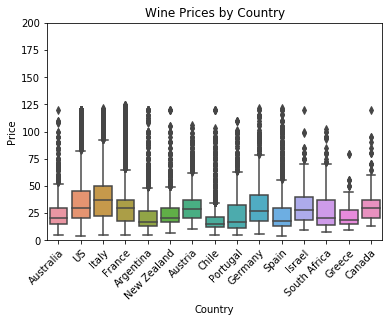

In [20]:
ax = sn.boxplot(x="country", y = "price", data=price_country)
ax.set(ylim=(0, 200))
ax.set_title("Wine Prices by Country")
ax.set(xlabel = "Country", ylabel = "Price")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha="right",rotation_mode='anchor')

plt.show()


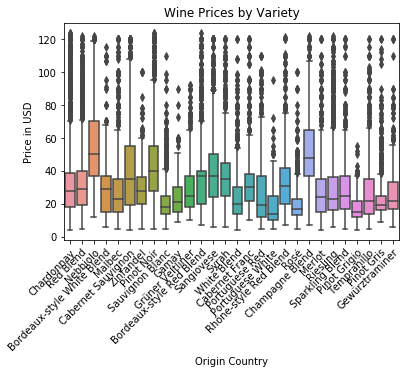

In [21]:
prices_by_variety = data[["price", "variety"]].dropna(how = "any")
#Remove all data greater than the 98th percentile
val = prices_by_variety["price"].quantile(0.98)
prices_by_variety = prices_by_variety[prices_by_variety["price"] < val]
# Only consider varieties where at least 500 wines have been reviewed
prices_by_variety = prices_by_variety.groupby("variety").filter(lambda x: (x["price"].count() >= 500))
ax = sn.boxplot(x="variety", y = "price", data=prices_by_variety)
ax.set_title("Wine Prices by Variety")
ax.set(xlabel = "Origin Country", ylabel = "Price in USD")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha="right",rotation_mode='anchor')
plt.show()

We can see from the above box plot that the Nebbiola has the highest average price, and it is the costliest type of wine to be sold.

### Working on the Numerical Data 

(array([  687.,  3091.,  9806., 16606., 16562., 16126., 10396.,  3702.,
          546.,    86.]),
 array([ 80.,  82.,  84.,  86.,  88.,  90.,  92.,  94.,  96.,  98., 100.]),
 <a list of 10 Patch objects>)

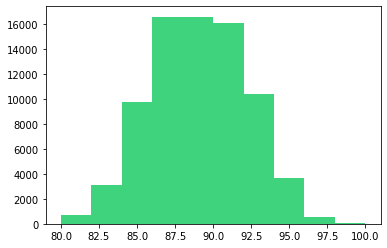

In [22]:
plt.hist(new_data['points'], color = '#3FD37D')

The above histogram shows that the points data follows a normal distribution.

(array([245.,  88.,  87.,  71.,  44.,  30.,  31.,   9.,  33.,  19.]),
 array([170., 203., 236., 269., 302., 335., 368., 401., 434., 467., 500.]),
 <a list of 10 Patch objects>)

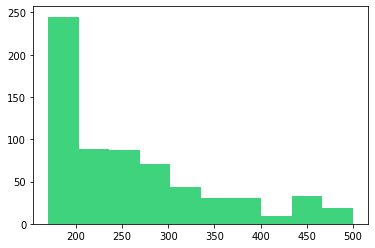

In [23]:
plt.hist(new_data['price'], color = '#3FD37D', range = [170,500])

WE CAN SEE THAT MOST THE NUMBER OF PRICE VALUES KEEP DECREASES AFTER 170 AND HENCE WE CAN REMOVE THEM

In [24]:
new_data.drop(new_data[new_data['price'] > 170].index, axis=0 ,inplace = True)

/Users/tapas/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


 Dropping the country column as the review title provides sufficient information regarding the location.

In [25]:
new_data.drop(columns = ['country'], axis = 1, inplace = True)

In [26]:
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer

In [27]:
stopwords = set(stopwords.words('english'))
detokenizer = TreebankWordDetokenizer()

In [28]:
def cleaned_desc(desc):
    desc = word_tokenize(desc.lower())
    desc = [token for token in desc if token not in stopwords and token.isalpha() and len(token) > 4]
    return detokenizer.detokenize(desc)

data['clean_desc'] = data["review_description"].apply(cleaned_desc)
word_occurance = data['clean_desc'].str.split(expand = True).stack().value_counts()


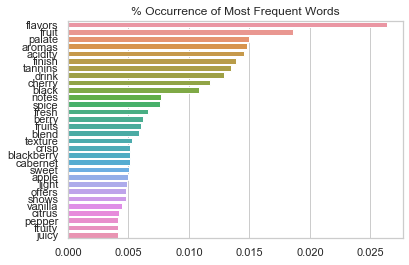

In [29]:
total_words = sum(word_occurance)

#Plotting the most common words
top_words = word_occurance[:30]/total_words

sn.set(style="whitegrid")
ax = sn.barplot(x = top_words.values, y = top_words.index)
ax.set_title("% Occurrence of Most Frequent Words")

plt.show()

From the above plot, we can see that wine has been used the most number of times in the reviews posted by the users, followed by flavors adn fruit.

In [30]:
new_data.head()

,review_title,review_description,points,price,province,variety
0,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",83,10.0,Australia Other,Chardonnay
1,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,89,15.0,Washington,Red Blend
2,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,94,80.0,Piedmont,Nebbiolo
3,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,87,22.0,Southwest France,Bordeaux-style White Blend
4,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",88,33.0,France Other,Malbec


In [31]:
new_data['cleaned_desc'] =  new_data['review_description'].apply(cleaned_desc)

/Users/tapas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
new_data.reset_index(inplace= True)

### Vectorizing the review_description and review_title columns with the help of Bag of Words

In [33]:
new_data.cleaned_desc.values

array(['classic chardonnay aromas apple palate marked decent intensity sweetness orange candy notes rather short finish',
       'equal parts syrah merlot balance cabernet sauvignon aromas fruit vanilla cherry flavors bring sense deliciousness resist',
       'barolo conca opens concentration soothing aromas black fruit spice prune dried lavender presents ethereal delicate aromas mouth delivers thicker flavors chocolate mocha drink',
       ...,
       'pungent notes turmeric dried flower first underlying scents tobacco cassis palate medium bodied chocolaty bears chalky tannins finish',
       'lively fruity weight structure keeping instant drinkability along sense balance',
       'vital cabernet immediate attraction deceptive enjoy brimming cherry black currants finish caramelized soften mellow eight years maybe longer round estate cabernet years'],
      dtype=object)

In [40]:
vect = CountVectorizer(stop_words='english')
vect.fit(new_data.cleaned_desc.values)

In [35]:
bag =vect.transform(new_data.cleaned_desc.values)

In [36]:
bags = pd.DataFrame(bag.toarray())
bags.columns = vect.get_feature_names()

In [41]:
new_data['cleaned_title'] =  new_data['review_title'].apply(cleaned_desc)

/Users/tapas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
vect = CountVectorizer(stop_words='english')
vect.fit(new_data.cleaned_title.values)
bag2 =vect.transform(new_data.cleaned_desc.values)
bags2 = pd.DataFrame(bag2.toarray())
bags2.columns = vect.get_feature_names()

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [48]:
new_data.drop(columns = ['review_description', 'review_title'],axis = 1, inplace = True)

In [46]:
bags3 = bags.append(bags2)

KeyboardInterrupt: 

In [ ]:
final_data = new_data.append(bags3)

In [49]:
output_data = final_data['variety']

In [ ]:
final_data.drop(columns = ['variety'], axis =1, inplace = True)

### Building model

In [ ]:
labelEncoder = LabelEncoder()
output_data = labelEncoder.fit_transform(output_data)
output_data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(final_data, output_data, test_size=0.2) 

In [ ]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=len(countVectorizer.get_feature_names())))
model.add(Dense(units=output_data.max()+1, activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=2, verbose=1)

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=1)
print ('The accuracy of the model is %s' % scores[1])